<a href="https://colab.research.google.com/github/nirajprasad12/ML_project/blob/main/Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Packages

In [3]:
import pandas as pd
import numpy as np
#!pip install xlrd --upgrade 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.special import expit, logit
from scipy.optimize import minimize
from mlxtend.plotting import plot_decision_regions

### Run this upgrade to ensure XLRD is at its latest version.

Restart Kernel after this and comment out this code block.

In [4]:
# !pip install xlrd --upgrade 

#Data import

In [5]:
df = pd.read_excel("default of credit card clients.xls", skiprows = 1)

# Exploratory Data Analysis (EDA)

In [6]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Converting Bill amt and Pay amt columns to float

In [7]:
df[df.columns[12:24]] = df[df.columns[12:24]].astype(float) 
df = df.drop('ID', axis=1)

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  int64  
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

### Renaming columns to make sense

In [9]:
rename_col= {"LIMIT_BAL": "Given_Credits", 
             "PAY_0": "REPAY_SEPT", 
             "PAY_2": "REPAY_AUG", 
             "PAY_3": "REPAY_JULY", 
             "PAY_4": "REPAY_JUN", 
             "PAY_5": "REPAY_MAY", 
             "PAY_6": "REPAY_APRIL", 
             "BILL_AMT1": "SEPT_BILL", 
             "BILL_AMT2": "AUG_BILL", 
             "BILL_AMT3": "JULY_BILL", 
             "BILL_AMT4": "JUN_BILL", 
             "BILL_AMT5": "MAY_BILL", 
             "BILL_AMT6": "APRIL_BILL", 
             "PAY_AMT1": "PAY_SEPT", 
             "PAY_AMT2": "PAY_AUG", 
             "PAY_AMT3": "PAY_JULY", 
             "PAY_AMT4": "PAY_JUN", 
             "PAY_AMT5": "PAY_MAY", 
             "PAY_AMT6": "PAY_APRIL", 
             "default payment next month": "DEFAULT"} 

df=df.rename(rename_col,axis=1)

np.array(df.columns)

array(['Given_Credits', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'REPAY_SEPT', 'REPAY_AUG', 'REPAY_JULY', 'REPAY_JUN', 'REPAY_MAY',
       'REPAY_APRIL', 'SEPT_BILL', 'AUG_BILL', 'JULY_BILL', 'JUN_BILL',
       'MAY_BILL', 'APRIL_BILL', 'PAY_SEPT', 'PAY_AUG', 'PAY_JULY',
       'PAY_JUN', 'PAY_MAY', 'PAY_APRIL', 'DEFAULT'], dtype=object)

### Some Visualization and Data Exploration

1) Let's find the overall description of our dataset now

In [10]:
df.describe(include="all")

,Given_Credits,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUN,REPAY_MAY,...,JUN_BILL,MAY_BILL,APRIL_BILL,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUN,PAY_MAY,PAY_APRIL,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


2) Credit Distribution and Credit Range plots

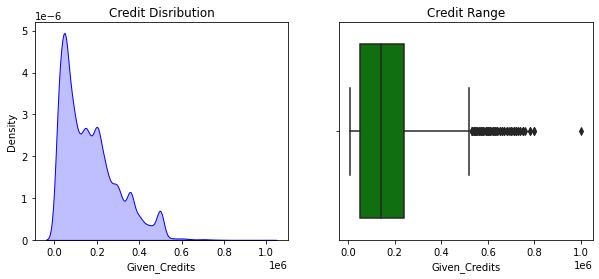

In [11]:
fig, axes=plt.subplots(1,2,figsize=(10,4))
sns.kdeplot(data=df,x="Given_Credits",color='b',fill=True,ax=axes[0])
sns.boxplot(x=df.Given_Credits,color='g',ax=axes[1])
axes[0].set_title("Credit Disribution")
axes[1].set_title("Credit Range")
plt.show()

3) Gender Distribution Plot

Male(1) vs Female(2) Counts and Plot

males: count = 11888 (about 39.63 %) 
females: count = 18112 (about 60.37 %)



<function matplotlib.pyplot.show>

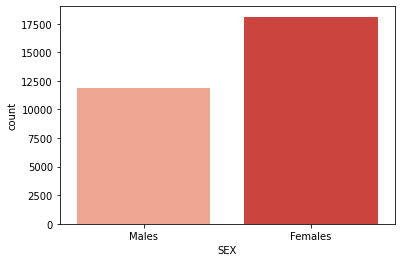

In [12]:
males_count = df[df.SEX==1].count()['SEX']
females_count = df[df.SEX==2].count()['SEX']
males_ratio = (males_count/ (df.shape[0]))*100
females_ratio = (females_count/df.shape[0])*100
print(f'males: count = {males_count} (about {np.round (males_ratio,2)} %) ')
print (f'females: count = {females_count} (about {np.round (females_ratio,2)} %)')
print('')

sns.countplot(data=df,x="SEX",palette='Reds')
plt.xticks(np.arange(2),labels=['Males','Females'])
plt.show

4) Education - Understanding

1:grad school, 2:university, 3:high school, 4:others, 5: unknown, 6: unknown

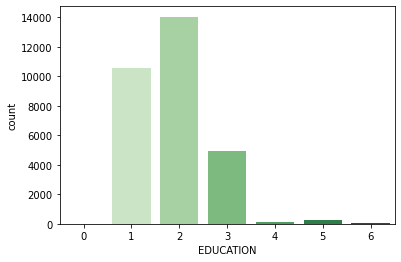

In [13]:
sns.countplot(data=df,x="EDUCATION",palette="Greens")
plt.show()

5) Marriage - Understanding

1:married 2:single 3:others

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64



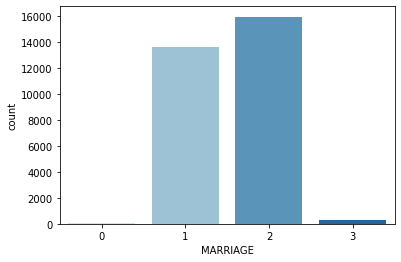

In [14]:
marriage_count=df.MARRIAGE.value_counts()
print(marriage_count)
print('')
sns.countplot(data=df,x="MARRIAGE",palette="Blues")
plt.show()

6) Age and Range of Age distribution

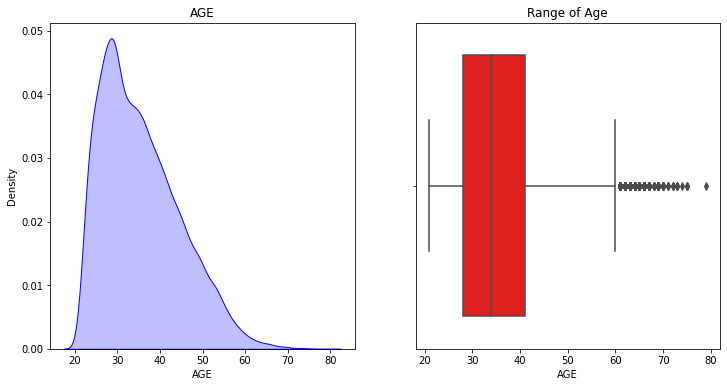

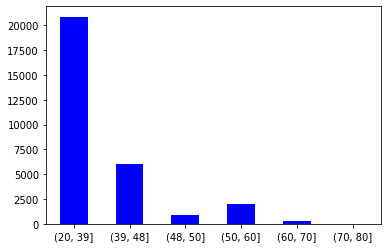

(20, 39]    20856
(39, 48]     6012
(50, 60]     1997
(48, 50]      863
(60, 70]      257
(70, 80]       15
Name: AGE, dtype: int64

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.kdeplot(data=df, x="AGE", color='b',fill=True, ax=axes[0])
sns.boxplot (x=df.AGE, color='r', ax=axes[1])

axes[0]. set_title('AGE')
axes[1].set_title( 'Range of Age')
plt.show()
grp = pd.cut(df['AGE'], bins=[20, 39, 48, 50, 60,70,80],include_lowest=False)
ax = grp.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
plt.show()
print('')
grp.value_counts()

7) REPAYMENT STATUS

PAY_0: Repayment status in September, 2005

PAY_2: Repayment status in August, 2005

PAY_3: Repayment status in July, 2005

PAY 4: Repayment status in June, 2005

PAY_5: Repayment status in May, 2005

PAY_6: Repayment status in April, 2005

VALUE MEANING

1: DULY PAID<br>
1:1 MONTH DELAY<br>
2:2 MONTH DELAY<br>
3:3 MONTH DELAY<br>
...<br>
8:8 MONTH DELAY<br>


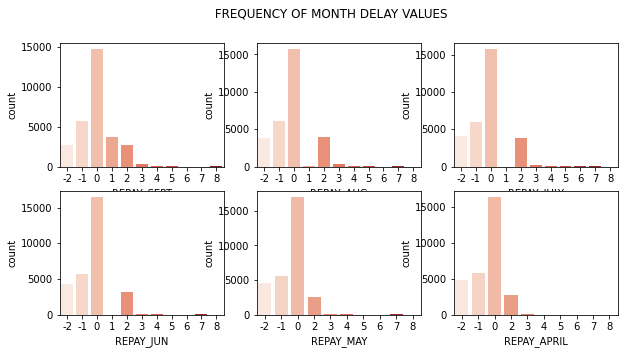

In [16]:
repay_part=df[['REPAY_SEPT','REPAY_AUG','REPAY_JULY','REPAY_JUN','REPAY_MAY','REPAY_APRIL','DEFAULT']]
f, axes=plt.subplots(2, 3, figsize=(10, 5), facecolor='white')
f.suptitle(' FREQUENCY OF MONTH DELAY VALUES')
ax1=sns.countplot(x= "REPAY_SEPT", data=repay_part,palette="Reds", ax=axes[0,0])
ax2=sns.countplot(x= "REPAY_AUG", data=repay_part,palette="Reds", ax=axes[0,1])
ax3=sns.countplot(x= "REPAY_JULY", data=repay_part,palette="Reds", ax=axes[0,2])
ax4=sns.countplot(x= "REPAY_JUN", data=repay_part,palette="Reds", ax=axes[1,0])
ax5=sns.countplot(x= "REPAY_MAY", data=repay_part,palette="Reds", ax=axes[1,1])
ax6=sns.countplot(x= "REPAY_APRIL",data=repay_part,palette="Reds", ax=axes[1,2])

8) AMOUNT OF BILL STATEMENT

SEPT_BILL:Amount of bill statement in September, 2005 <br>
AUG_BILL:Amount of bill statement in August, 2005<br>
JULY_BILL:Amount of bill statement in July, 2005<br>
JUN_BILL:Amount of bill statement in June,2005<br>
MAY_BILL:Amount of bill statement in May, 2005<br>
APRIL_BILL:Amount of bill statement in April,2005<br>


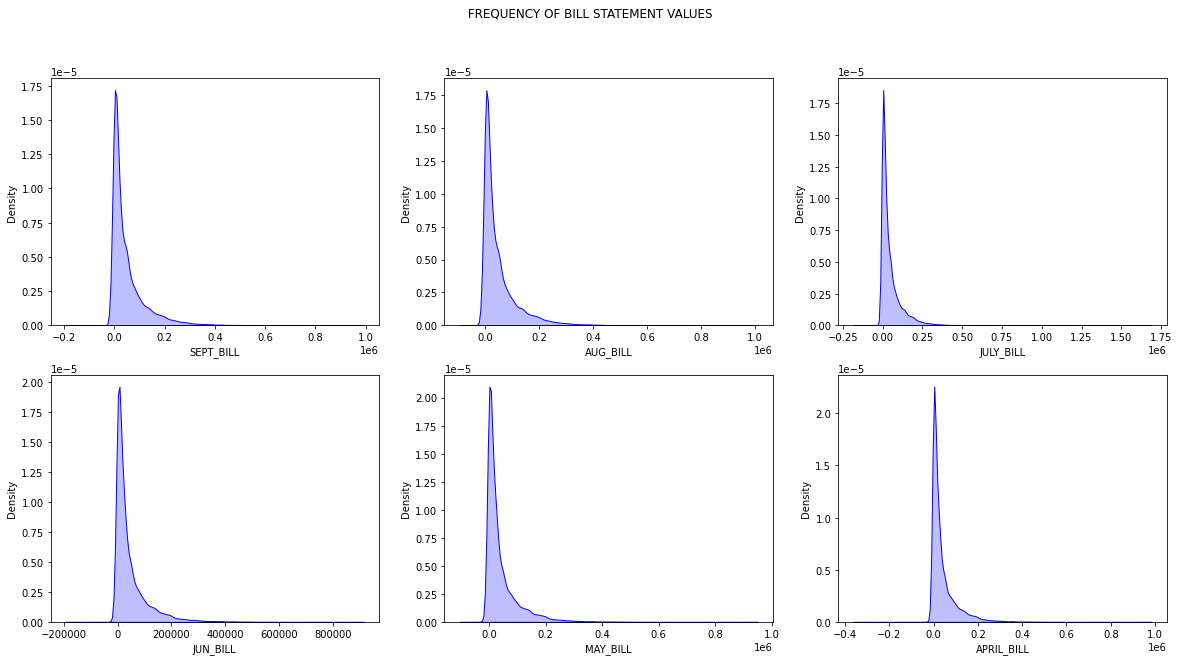

In [17]:
bill_part=df[['SEPT_BILL','AUG_BILL','JULY_BILL','JUN_BILL','MAY_BILL','APRIL_BILL']]
f, axes=plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle(' FREQUENCY OF BILL STATEMENT VALUES ')
ax1=sns.kdeplot(x= "SEPT_BILL", data=bill_part,color='b',fill=True, ax=axes[0,0])
ax2=sns.kdeplot(x= "AUG_BILL", data=bill_part,color='b',fill=True, ax=axes[0,1])
ax3=sns.kdeplot(x= "JULY_BILL", data=bill_part,color='b',fill=True, ax=axes[0,2])
ax4=sns.kdeplot(x= "JUN_BILL", data=bill_part,color='b',fill=True, ax=axes[1,0])
ax5=sns.kdeplot(x= "MAY_BILL", data=bill_part,color='b',fill=True, ax=axes[1,1])
ax6=sns.kdeplot(x= "APRIL_BILL",data=bill_part,color='b',fill=True, ax=axes[1,2])

9) DEFAULT

0:NO <br>
1:YES <br>


0    23364
1     6636
Name: DEFAULT, dtype: int64



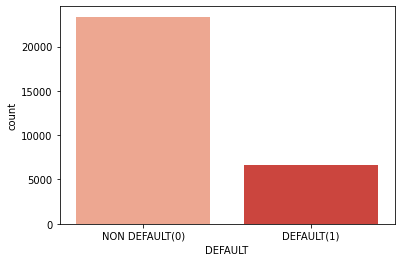

In [47]:
print(df['DEFAULT'].value_counts())
print('')
sns.countplot(data=df,x='DEFAULT',palette='Reds')
plt.xticks(np.arange(2),['NON DEFAULT(0)','DEFAULT(1)'])
plt.show()

### Multivariate Analysis

1) SEX VS DEFAULT

In [19]:
def_male=df[(df['SEX']==1) &(df['DEFAULT']==1)].shape[0]
def_female=df[(df['SEX']==2) &(df['DEFAULT']==1)].shape[0]
print(f'Male_default:{def_male},Female_default:{def_female} ')
print(f'Male_default % :{def_male*100/males_count} ' )
print(f'Female_default % :{def_female*100/females_count} ' ) 

Male_default:2873,Female_default:3763 
Male_default % :24.167227456258413 
Female_default % :20.776280918727917 


2) EDUCATION vs DEFAULT

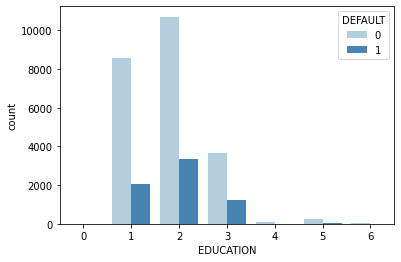

In [20]:
sns.countplot(data=df,x='EDUCATION',hue='DEFAULT',palette='Blues')
plt.show()

3) MARRIAGE vs DEFAULT


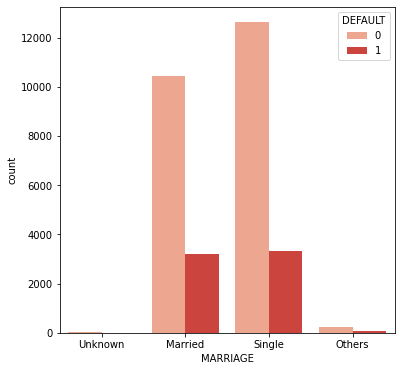

In [21]:
fig, ax=plt.subplots(figsize=(6,6))
sns.countplot(ax=ax,data=df,x="MARRIAGE",hue="DEFAULT",palette="Reds")
plt.xticks(np.arange(4),['Unknown','Married','Single','Others'])
plt.show()

4) AGE vs DEFAULT

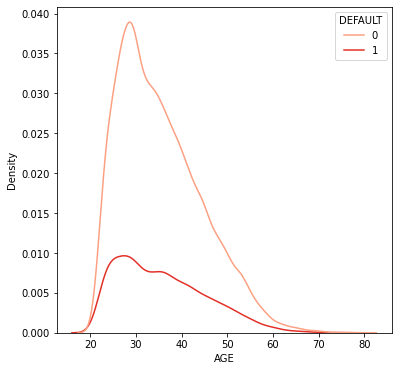

In [22]:
fig, ax=plt.subplots(figsize=(6,6))
sns.kdeplot(ax=ax,data=df,x="AGE",hue="DEFAULT",palette='Reds')
plt.show()

5) REPAY STATUS vs DEFAULT


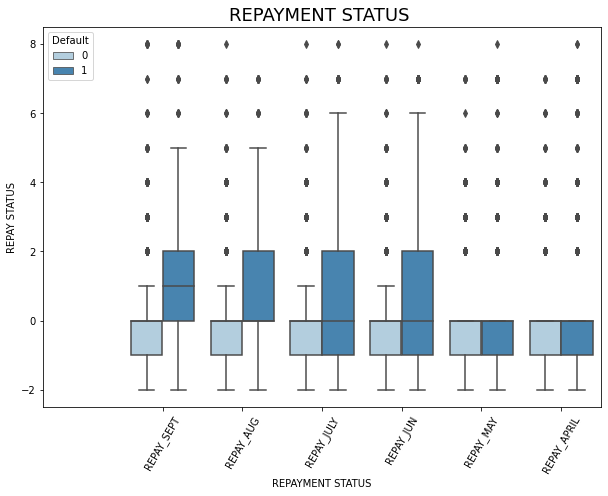

In [23]:
repay = pd.melt(repay_part, id_vars="DEFAULT", var_name="REPAYMENT STATUS", value_name="REPAY STATUS")
plt.figure(figsize=(10,7))
sns.boxplot (y= "REPAY STATUS", x="REPAYMENT STATUS", hue = "DEFAULT", data=repay, palette='Blues')
plt.legend (loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.xticks(rotation=60)
plt.title('REPAYMENT STATUS ', size=18)
plt. show()
# plt.savefig(*ImageName', format='png', dpi=200);

6) BILL AMOUNT vs DEFAULT

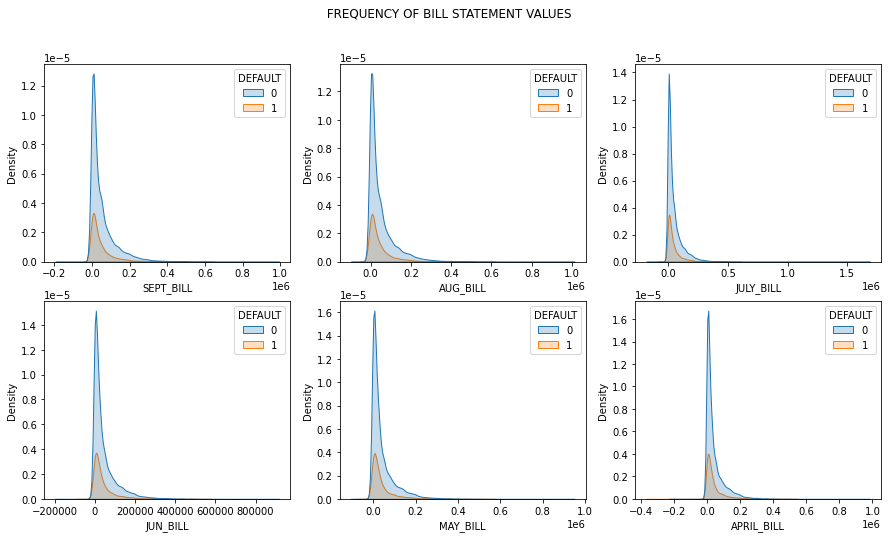

In [24]:
bill_part=df[['SEPT_BILL','AUG_BILL','JULY_BILL','JUN_BILL','MAY_BILL','APRIL_BILL','DEFAULT']]
f, axes=plt.subplots(2,3,figsize=(15,8),facecolor='white')
f.suptitle(' FREQUENCY OF BILL STATEMENT VALUES ')
ax1=sns.kdeplot(x= "SEPT_BILL",hue="DEFAULT" , data=bill_part,color='b',fill=True, ax=axes[0,0])
ax2=sns.kdeplot(x= "AUG_BILL", hue="DEFAULT" ,data=bill_part,color='b',fill=True, ax=axes[0,1])
ax3=sns.kdeplot(x= "JULY_BILL", hue="DEFAULT", data=bill_part,color='b',fill=True, ax=axes[0,2])
ax4=sns.kdeplot(x= "JUN_BILL", hue="DEFAULT",data=bill_part,color='b',fill=True, ax=axes[1,0])
ax5=sns.kdeplot(x= "MAY_BILL", hue="DEFAULT",data=bill_part,color='b',fill=True, ax=axes[1,1])
ax6=sns.kdeplot(x= "APRIL_BILL", hue="DEFAULT" ,data=bill_part,color='b',fill=True, ax=axes[1,2])

7) PREVIOUS PAYMENT AMOUNT vs DEFAULT

,count,mean,std,min,25%,50%,75%,max
PAY_SEPT,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AUG,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0
PAY_JULY,30000.0,5225.681500,17606.961470,0.0,390.00,1800.0,4505.00,896040.0
PAY_JUN,30000.0,4826.076867,15666.159744,0.0,296.00,1500.0,4013.25,621000.0
PAY_MAY,30000.0,4799.387633,15278.305679,0.0,252.50,1500.0,4031.50,426529.0
PAY_APRIL,30000.0,5215.502567,17777.465775,0.0,117.75,1500.0,4000.00,528666.0
DEFAULT,30000.0,0.221200,0.415062,0.0,0.00,0.0,0.00,1.0


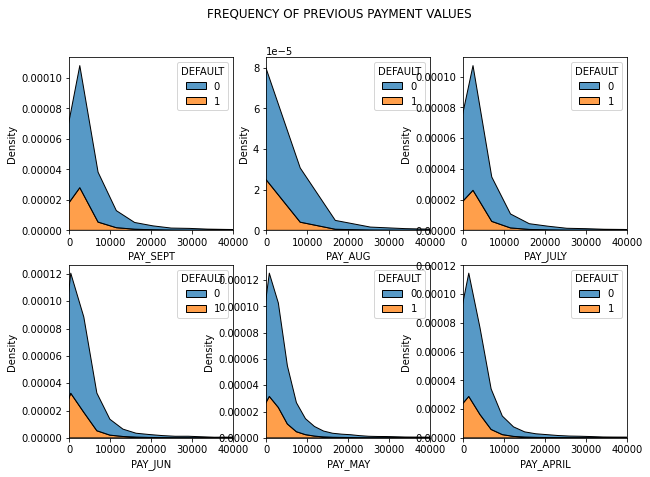

In [25]:
pay_part=df[['PAY_SEPT','PAY_AUG','PAY_JULY','PAY_JUN','PAY_MAY','PAY_APRIL','DEFAULT']]

display(pay_part.describe().T)
print('')

f,axes=plt.subplots (2, 3, figsize=(10,7), facecolor='white')
f.suptitle("FREQUENCY OF PREVIOUS PAYMENT VALUES")

ax1= sns.kdeplot(x="PAY_SEPT", hue="DEFAULT", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[0,0])
ax1.set_xlim([0,40000])
ax2= sns.kdeplot(x="PAY_AUG", hue="DEFAULT", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[0,1])
ax2.set_xlim([0,40000])
ax3= sns.kdeplot(x="PAY_JULY", hue="DEFAULT", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[0,2])
ax3.set_xlim([0,40000])
ax4= sns.kdeplot(x="PAY_JUN", hue="DEFAULT", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[1,0])
ax4.set_xlim([0,40000])
ax5= sns.kdeplot(x="PAY_MAY", hue="DEFAULT", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[1,1])
ax5.set_xlim([0,40000])
ax6= sns.kdeplot(x="PAY_APRIL", hue="DEFAULT", data=pay_part, color='g', fill=True,multiple='stack', ax=axes[1,2])
ax6.set_xlim([0,40000])             
plt. show()

# Data Wrangling

### Dropping y labels and storing it in a different variable

In [26]:
y = df['DEFAULT']
X = df.drop('DEFAULT', axis = 1)

### Check Correlation

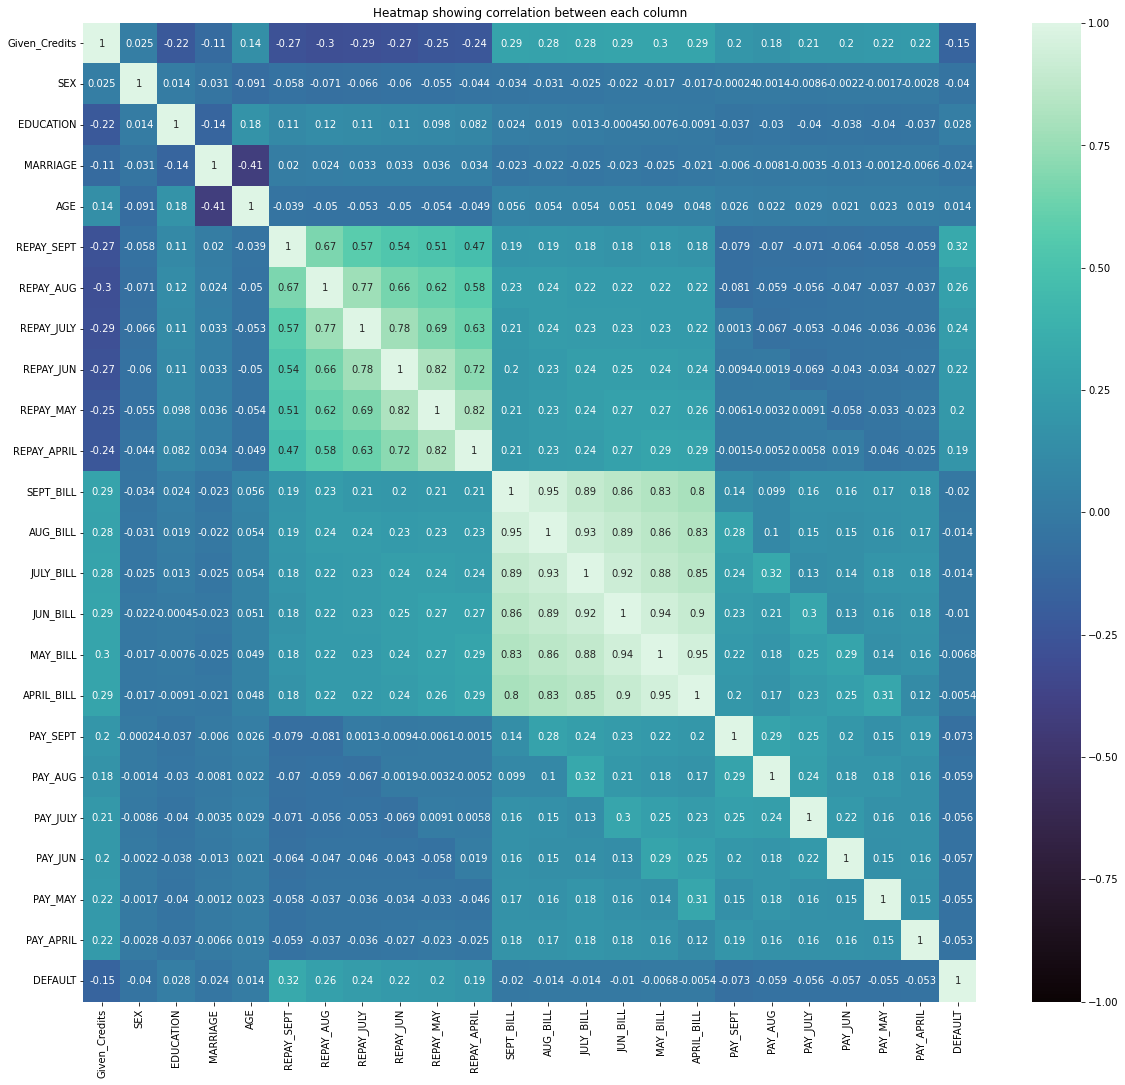

In [27]:
corr = df.corr()
plt.figure(figsize = (20,18))
sns.heatmap(corr, annot = True, vmin = -1.0, cmap = 'mako')
plt.title('Heatmap showing correlation between each column')
plt.show()

### Nominal vs Ordinal Features

In [28]:
{column: len(df[column].unique()) for column in df.columns}

{'AGE': 56,
 'APRIL_BILL': 20604,
 'AUG_BILL': 22346,
 'DEFAULT': 2,
 'EDUCATION': 7,
 'Given_Credits': 81,
 'JULY_BILL': 22026,
 'JUN_BILL': 21548,
 'MARRIAGE': 4,
 'MAY_BILL': 21010,
 'PAY_APRIL': 6939,
 'PAY_AUG': 7899,
 'PAY_JULY': 7518,
 'PAY_JUN': 6937,
 'PAY_MAY': 6897,
 'PAY_SEPT': 7943,
 'REPAY_APRIL': 10,
 'REPAY_AUG': 11,
 'REPAY_JULY': 11,
 'REPAY_JUN': 11,
 'REPAY_MAY': 10,
 'REPAY_SEPT': 11,
 'SEPT_BILL': 22723,
 'SEX': 2}

### Binary Encoding of Norminal Features Education and Marital Status

In [29]:
edu_df = pd.get_dummies(X['EDUCATION'], prefix = 'EDU')
mar_df = pd.get_dummies(X['MARRIAGE'], prefix = 'MAR')
#df_final = X.copy()
X = pd.concat([X, edu_df, mar_df], axis = 1)
X = X.drop(['EDUCATION', 'MARRIAGE'], axis = 1)

In [30]:
X.columns
#X.head()

Index(['Given_Credits', 'SEX', 'AGE', 'REPAY_SEPT', 'REPAY_AUG', 'REPAY_JULY',
       'REPAY_JUN', 'REPAY_MAY', 'REPAY_APRIL', 'SEPT_BILL', 'AUG_BILL',
       'JULY_BILL', 'JUN_BILL', 'MAY_BILL', 'APRIL_BILL', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JULY', 'PAY_JUN', 'PAY_MAY', 'PAY_APRIL', 'EDU_0',
       'EDU_1', 'EDU_2', 'EDU_3', 'EDU_4', 'EDU_5', 'EDU_6', 'MAR_0', 'MAR_1',
       'MAR_2', 'MAR_3'],
      dtype='object')

### Scaling

*To standardize all columns to make it even and values lie around 0*

In [31]:
scalar_np = StandardScaler()
X_np = scalar_np.fit_transform(X) # Returns numpy array, converting to PD in next line
X = pd.DataFrame(X_np, columns = X.columns)

Mean of all columns are now very close to 0

In [32]:
X.head(), X.mean()

(   Given_Credits       SEX       AGE  REPAY_SEPT  REPAY_AUG  REPAY_JULY  \
 0      -1.136720  0.810161 -1.246020    1.794564   1.782348   -0.696663   
 1      -0.365981  0.810161 -1.029047   -0.874991   1.782348    0.138865   
 2      -0.597202  0.810161 -0.161156    0.014861   0.111736    0.138865   
 3      -0.905498  0.810161  0.164303    0.014861   0.111736    0.138865   
 4      -0.905498 -1.234323  2.334029   -0.874991   0.111736   -0.696663   
 
    REPAY_JUN  REPAY_MAY  REPAY_APRIL  SEPT_BILL  ...     EDU_1   EDU_2  \
 0  -0.666599  -1.530046    -1.486041  -0.642501  ... -0.738375  1.0669   
 1   0.188746   0.234917     1.992316  -0.659219  ... -0.738375  1.0669   
 2   0.188746   0.234917     0.253137  -0.298560  ... -0.738375  1.0669   
 3   0.188746   0.234917     0.253137  -0.057491  ... -0.738375  1.0669   
 4   0.188746   0.234917     0.253137  -0.578618  ... -0.738375  1.0669   
 
       EDU_3     EDU_4     EDU_5     EDU_6     MAR_0     MAR_1     MAR_2  \
 0 -0.442752 -

# Train Model using packages to compare Accuracy between different models

## Train - Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

## Logistic Regression

In [34]:
model_LR = LogisticRegression(solver = 'lbfgs', max_iter = 5000).fit(X_train, y_train)

In [35]:
model_LR.score(X_test, y_test) * 100 # Accuracy

81.98333333333333

In [36]:
model_gnb = GaussianNB().fit(X_train, y_train)
model_gnb.score(X_test, y_test) * 100 #Accuracy

27.55

In [37]:
y_gnb_vals = pd.DataFrame(model_gnb.predict(X_test))
y_gnb_vals.index = y_test. index
pd.concat([y_gnb_vals, y_test], axis = 1).head(10) # Many missclassfications

,0,DEFAULT
8225,1,0
10794,1,0
9163,1,0
26591,1,0
6631,1,0
14161,1,1
252,1,1
2566,1,0
3478,1,0
2917,1,0


## SVM

In [38]:
model_svm = svm.SVC().fit(X_train, y_train)
model_svm.score(X_test, y_test) * 100

82.48333333333333

## KNN

In [39]:
model_neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
model_neigh.score(X_test, y_test) * 100

77.98333333333333

## Custom Base Logistic Regression Model

In [40]:
class LogisticRegression_Cust:
    
    def __init__(self, X, y, learningRate = 0.01, tolerance=0, maxIteration = 5000):
        self.X = X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    def sigmoid(self, X):
        #z = X.dot(self.w)
        #sig = 1 / (1+np.exp(-z))
        #return sig
        return expit(X)
    
    def costFunction(self, X, y):
        
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
        cost = pred_.mean()
        return cost
    
    def gradientRegularized(self, X, y):
        lambda_term = 0
        sigmoid = self.sigmoid(X.dot(self.w))
        gradient = (sigmoid - y).dot(X)*(1/X.shape[0]) + lambda_term*self.w
        return gradient
    
    def gradientDescent(self, X, y):
        errors = []
        last = float('inf')
        
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradientRegularized(X, y)
            curr = self.costFunction(X, y)
            
            diff = last - curr
            last = curr
            
            errors.append(curr)
            
            if abs(diff) < self.tolerance:
                print("The model stopped learning")
                break  
                
        plt.xlabel('Iterations')
        plt.ylabel('Error')
        plt.ylim([-2500, 0])
        plt.plot(list(range(self.maxIteration)), errors, '-r')
        
    def predict(self, X):
        pred = self.sigmoid(X.dot(self.w))
        return np.around(pred)
    
    def evaluate(self, y, y_hat):
        
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        return recall, precision, accuracy
    
    def fit(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, train_size = 0.8, random_state = 10)
        
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        
        #print(self.w)
        
        y_hat_train = self.predict(self.X_train)
        recall, precision, accuracy = self.evaluate(self.y_train, y_hat_train)
        
        print('Over Training Model:')
        print("Accuracy was:", accuracy*100)
        print("Recall was:", recall*100)
        print("Precision was:", precision*100)

        y_hat_test = self.predict(self.X_test)
        recall, precision, accuracy = self.evaluate(self.y_test, y_hat_test)
        
        print('')
        print('Over Testing Model:')
        print("Accuracy was:", accuracy*100)
        print("Recall was:", recall*100)
        print("Precision was:", precision*100)
        

100%|██████████| 5000/5000 [00:46<00:00, 108.04it/s]


Over Training Model:
Accuracy was: 59.699999999999996
Recall was: 71.63000564015792
Precision was: 31.821598596842897

Over Testing Model:
Accuracy was: 59.08333333333333
Recall was: 70.84282460136674
Precision was: 31.05858854860186


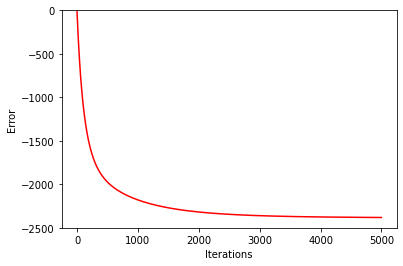

In [41]:
lr = LogisticRegression_Cust(X, y)
lr.fit()

## Classification plot for LR

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0.5, 1.0, 'Logistic Regression Curve - Credit Limit vs. Default')]

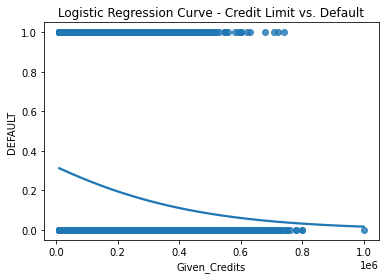

In [42]:
x1 = df['Given_Credits']
sns.regplot(x = x1, y = y, data=df, logistic=True, ci=None).set(title='Logistic Regression Curve - Credit Limit vs. Default')

## Soft Margin SVM

In [43]:
class MaxMarginClassifier:
    def __init__(self, C):
        self.C = C
    
    def fit(self, X, y):
        N = len(y)
        Xy = X * y[:, np.newaxis]
        Gramxy = np.matmul(Xy, Xy.T)
        def ld0(G, alpha):
            return alpha.sum() - 0.5*alpha.dot(alpha.dot(G))
        
        def derivationLd0(G, alpha):
            return np.ones_like(alpha) - alpha.dot(G)
        
        alpha = np.ones(N)
        
        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C * np.ones(N)))
        
        
        
        constraints = ({'type': 'eq', 'fun': lambda a: np.dot(a,y) , 'jac' : lambda a: y},
                      {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})
        
        
        
        optRes = minimize(fun = lambda a: -ld0(Gramxy, a),
                                   x0 = alpha,
                                   jac = lambda a: - derivationLd0(Gramxy, a),
                                   constraints = constraints)
                
        self.alpha = optRes.x
        self.w = np.sum((self.alpha[:, np.newaxis] * Xy), axis = 0)
  
        epsilons = 1e-6
        
        self.supportVectors = X[self.alpha > epsilons] #support vector points
        self.supportLabels = y[self.alpha > epsilons]
        
        b = []
        for i in range(len(self.supportVectors)):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append(b_i)
            
        self.intercept = sum(b)/len(b)
        
        signedDist = np.matmul(self.supportVectors, self.w)
    
    def predict(self, X):
        return 2*(np.matmul(X, self.w) + self.intercept > 0) - 1

**We will be using a smaller training set over this particular model because the optimize minimize function was taking forever to run over the original training model. The system kept crashing because 8GB of RAM was not enough.**

In [44]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X, y, train_size = 0.03, random_state = True, stratify = y)


In [45]:
model = MaxMarginClassifier( C = 62 ) #, gamma = 0.008, kernel = 'rbf' )

model.fit(X_train_small.to_numpy(), y_train_small.to_numpy())

y_pred_small = model.predict(X_train_small)
y_train1_small = (y_train_small == 1)
y_pred1_small = (y_pred_small == 1)
        
accuracy = (y_train1_small == y_pred1_small).sum() / y_train1_small.size
precision = (y_train1_small & y_pred1_small).sum() / y_pred1_small.sum()
recall = (y_train1_small & y_pred1_small).sum() / y_train1_small.sum()
print("Training:")
print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)

y_pred_test_small = model.predict(X_test_small)
y_test1_small = (y_test_small == 1)
y_pred1_test_small = (y_pred_test_small == 1)
        
accuracy = (y_test1_small == y_pred1_test_small).sum() / y_test1_small.size
precision = (y_test1_small & y_pred1_test_small).sum() / y_pred1_test_small.sum()
recall = (y_test1_small & y_pred1_test_small).sum() / y_test1_small.sum()
print("Test")
print("Accuracy:", accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
#62

Training:
Accuracy: 60.77777777777777
Precision: 23.448275862068964
Recall: 34.17085427135678
Test
Accuracy: 59.402061855670105
Precision: 21.57733375621102
Recall: 31.70731707317073


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVM Decision Region Boundary')

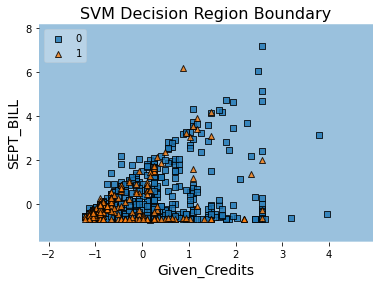

In [46]:
X1 = X_train_small[['Given_Credits', 'SEPT_BILL']]
y1 = y_train_small

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X1.values, y1.values) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X1.values, 
                      y=y1.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X1.columns[0], size=14)
plt.ylabel(X1.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

